In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')


Using TensorFlow backend.


17227776/17225924 [==============================] - 0s 0us/step


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
def loadImage(imageAddr):
    filename = imageAddr
    # load an image in PIL format
    original = load_img(filename, target_size=(224, 224))
    plt.imshow(original)
    numpy_image = img_to_array(original)
    plt.imshow(np.uint8(numpy_image))
    image_batch = np.expand_dims(numpy_image, axis=0)
    plt.imshow(np.uint8(image_batch[0]))
    return image_batch
def loadImageNoPrint(imageAddr):
    filename = imageAddr
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    return image_batch

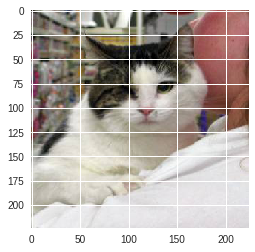

In [3]:
image_batch=loadImage('../data/test_set/cats/cat.4600.jpg')
outputOfAllClassifier={}

### Predictions made by VGG16

In [4]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions

# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
for val in label[0]:
   print(val)
    
print("-----Highest Probable Prediction-----")
highestPrediction=max(label[0],key=lambda item:item[2])
print(highestPrediction)
outputOfAllClassifier['VGG16']=highestPrediction[1]

40960/35363 [==================================] - 0s 1us/step
('n02123045', 'tabby', 0.09164398)
('n03958227', 'plastic_bag', 0.09161947)
('n02883205', 'bow_tie', 0.06943149)
('n02124075', 'Egyptian_cat', 0.038044702)
('n02123159', 'tiger_cat', 0.02438698)
-----Highest Probable Prediction-----
('n02123045', 'tabby', 0.09164398)


### Predictions made by Inception

In [5]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions

# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
for val in label[0]:
   print(val)
print("-----Highest Probable Prediction-----")
highestPrediction=max(label[0],key=lambda item:item[2])
print(highestPrediction)
outputOfAllClassifier['Inception']=highestPrediction[1]


('n02123045', 'tabby', 0.7907851)
('n02123159', 'tiger_cat', 0.1820284)
('n02124075', 'Egyptian_cat', 0.021572882)
('n02871525', 'bookshop', 0.00084087887)
('n02364673', 'guinea_pig', 0.00030279908)
-----Highest Probable Prediction-----
('n02123045', 'tabby', 0.7907851)


### Predictions made by ResNet50

In [6]:
# prepare the image for the VGG model
processed_image = resnet50.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions

# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
for val in label[0]:
   print(val)
print("-----Highest Probable Prediction-----")
highestPrediction=max(label[0],key=lambda item:item[2])
print(highestPrediction)
outputOfAllClassifier['ResNet']=highestPrediction[1]

('n02123045', 'tabby', 0.23256153)
('n02124075', 'Egyptian_cat', 0.22478576)
('n02123159', 'tiger_cat', 0.0687951)
('n04033995', 'quilt', 0.06175884)
('n03958227', 'plastic_bag', 0.03732585)
-----Highest Probable Prediction-----
('n02123045', 'tabby', 0.23256153)


### Predictions made by MobileNet

In [7]:
# prepare the image for the VGG model
processed_image = mobilenet.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# print predictions

# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
for val in label[0]:
   print(val)
print("-----Highest Probable Prediction-----")
highestPrediction=max(label[0],key=lambda item:item[2])
print(highestPrediction)
outputOfAllClassifier['MobileNet']=highestPrediction[1]

('n02124075', 'Egyptian_cat', 0.8283879)
('n02123045', 'tabby', 0.047297243)
('n03887697', 'paper_towel', 0.03623899)
('n02123159', 'tiger_cat', 0.025771214)
('n02127052', 'lynx', 0.017186591)
-----Highest Probable Prediction-----
('n02124075', 'Egyptian_cat', 0.8283879)


###  Final Output

The below output tells what is the highest prediction made by each of the classifier

In [8]:
for i in outputOfAllClassifier:
    print(i,outputOfAllClassifier[i],sep=" : ")

VGG16 : tabby
Inception : tabby
ResNet : tabby
MobileNet : Egyptian_cat


In [9]:
dogLables=["n02094114","n02113186","n02097130","n02096177","n02102480","n02113799","n02101556","n02098105","n02102973","n02095889","n02100877","n02096294","n02094433","n02093647","n02112706","n02095570","n02097047","n02113186","n02096585","n02105251","n02105505","n02105855","n02110627","n02092339","n02091134","n02106382","n02091032","n02108089","n02102318","n02086079","n02091467","n02095314","n02102177","n02113712","n02107574","n02094258","n02092002","n02112018","n02099429","n02115913","n02100583","n02086910","n02108551","n02106166","n02088094","n02093991","n02090622","n02101388","n02087046,""n02102040","n02108422","n02096051","n02107908","n02100236","n02085936","n02115641","n02108000","n02106030","n02089867","n02109047","n02093256","n02108915","n02107142","n02086240","n02099601","n02091831","n02093754","n02105162","n02104029","n02101006","n03670208","n02096437","n02112350","n02105056","n02110063","n02097298","n02111889","n02104365","n02097209","n02109525","n02098413","n02107312","n02090721","n02106662","n02097658","n02105641","n02098286","n02089078","n02089973","n02091635","n02099267","n02113624","n02099712","n02112137","n02100735","n02091244","n02113023","n02093428","n02090379","n02088466","n02099849","n02087394","n02110185","n02085620","n02088364","n02093859","n02088632","n02106550","n02109961","n02105412","n02084071","n02084732","n02087122","n02110341","n02084861","n02112826","n02113978","n02085272","n02111277",
"n02113335","n02110806","n02111129","n02112497","n02110958","n02103406","n02111626","n02111500","n02085374","n01322604"]
catLables=["n02497673","n04019541","n02127052","n02121808","n02124075","n02123394","n02122298","n02123159","n02123478","n02122725","n02123597","n02124484","n02124157",
"n02122878","n02123917","n02122510","n02124313","n02123045","n02123242","n02122430"]
    
def isDog(label):
    for i in dogLables:
        if i==label:
            return True
    return False

def isCat(label):
    for i in catLables:
        if i==label:
            return True
    return False
    

In [10]:
import numpy as np
import os
import glob
count=0
data_paths = [os.path.join('../data/test_set/dogs/','*jpg'),os.path.join('../data/test_set/cats/','*jpg')]
for path in data_paths:
    files = glob.glob(path)
    dog,cat,total=0,0,0
    for f in files:
        processed_image = vgg16.preprocess_input(loadImageNoPrint(f).copy())
        predictions = vgg_model.predict(processed_image)
        label = decode_predictions(predictions)
        highestPrediction=max(label[0],key=lambda item:item[2])
        if(isDog(highestPrediction[0])):
            dog+=1
        elif(isCat(highestPrediction[0])):
            cat+=1
        total+=1
    if count==0:
        print("Total Dogs: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",dog/total)
        count+=1
    else:
        print("Total Cats: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",cat/total)
        
    

Total Dogs:  1012
Dogs :  941
Cats :  0
Accuracy : 0.9298418972332015
Total Cats:  1011
Dogs :  121
Cats :  698
Accuracy : 0.6904055390702275


In [11]:
import numpy as np
import os
import glob
count=0
data_paths = [os.path.join('../data/test_set/dogs/','*jpg'),os.path.join('../data/test_set/cats/','*jpg')]
for path in data_paths:
    files = glob.glob(path)
    dog,cat,total=0,0,0
    for f in files:
        processed_image = inception_v3.preprocess_input(loadImageNoPrint(f).copy())
        predictions = inception_model.predict(processed_image)
        label = decode_predictions(predictions)
        highestPrediction=max(label[0],key=lambda item:item[2])
        if(isDog(highestPrediction[0])):
            dog+=1
        elif(isCat(highestPrediction[0])):
            cat+=1
        total+=1
    if count==0:
        print("Total Dogs: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",dog/total)
        count+=1
    else:
        print("Total Cats: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",cat/total)
        
    

Total Dogs:  1012
Dogs :  947
Cats :  0
Accuracy : 0.9357707509881423
Total Cats:  1011
Dogs :  89
Cats :  820
Accuracy : 0.811078140454995


In [12]:
import numpy as np
import os
import glob
count=0
data_paths = [os.path.join('../data/test_set/dogs/','*jpg'),os.path.join('../data/test_set/cats/','*jpg')]
for path in data_paths:
    files = glob.glob(path)
    dog,cat,total=0,0,0
    for f in files:
        processed_image = resnet50.preprocess_input(loadImageNoPrint(f).copy())
        predictions = resnet_model.predict(processed_image)
        label = decode_predictions(predictions)
        highestPrediction=max(label[0],key=lambda item:item[2])
        if(isDog(highestPrediction[0])):
            dog+=1
        elif(isCat(highestPrediction[0])):
            cat+=1
        total+=1
    if count==0:
        print("Total Dogs: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",dog/total)
        count+=1
    else:
        print("Total Cats: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",cat/total)
        
    

Total Dogs:  1012
Dogs :  944
Cats :  0
Accuracy : 0.932806324110672
Total Cats:  1011
Dogs :  98
Cats :  690
Accuracy : 0.6824925816023739


In [13]:
import numpy as np
import os
import glob
count=0
data_paths = [os.path.join('../data/test_set/dogs/','*jpg'),os.path.join('../data/test_set/cats/','*jpg')]
for path in data_paths:
    files = glob.glob(path)
    dog,cat,total=0,0,0
    for f in files:
        processed_image = mobilenet.preprocess_input(loadImageNoPrint(f).copy())
        predictions = mobilenet_model.predict(processed_image)
        label = decode_predictions(predictions)
        highestPrediction=max(label[0],key=lambda item:item[2])
        if(isDog(highestPrediction[0])):
            dog+=1
        elif(isCat(highestPrediction[0])):
            cat+=1
        total+=1
    if count==0:
        print("Total Dogs: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",dog/total)
        count+=1
    else:
        print("Total Cats: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",cat/total)
        
    

Total Dogs:  1012
Dogs :  936
Cats :  1
Accuracy : 0.924901185770751
Total Cats:  1011
Dogs :  102
Cats :  747
Accuracy : 0.7388724035608308


### Transfer Learning with VGG16


In [15]:
vgg_new_model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
vgg_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Setting the trainable property of all layers to zero

In [18]:
for layer in vgg_new_model.layers[:-1]:
    layer.trainable = False
vgg_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Add additional layers to the model
<ul>
    <li>Flatten Layer : Conerts 2D to 1D array</li>
    <li>Dense Layer : It is fully connected layer with 1024 nodes, RELU activation function</li>
    <li>Droupout Layer : Probability of considering nodes is 0.8</li>
    <li>Dense Layer : It is fully connected layer with 1024 nodes, RELU activation function</li>
    <li>Dense Layer : Output layer 1 node, Sigmoid activation function</li>
</ul>

In [34]:
from keras.layers import Flatten,Dense,Dropout
from keras.models import Model 
from keras import optimizers
x = vgg_new_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.8)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(input = vgg_new_model.input, output = predictions)
model_final.summary()
model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


### Preprocessing of input Images

In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('../data/training_set',target_size = (224, 224),batch_size = 32,class_mode = 'binary')
validation_set = train_datagen.flow_from_directory('../data/validation_set',target_size = (224, 224),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('../data/test_set',target_size = (224, 224),batch_size = 32,class_mode = 'binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Training the model

In [35]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
model_final.fit_generator(training_set,
                          steps_per_epoch = 1600,
                          epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 400,
                         max_queue_size=7,workers=3)

Epoch 1/10
1600/1600 [==============================] - 830s 519ms/step - loss: 0.4859 - acc: 0.7604 - val_loss: 0.3017 - val_acc: 0.8805
Epoch 2/10
1600/1600 [==============================] - 831s 519ms/step - loss: 0.3254 - acc: 0.8602 - val_loss: 0.2629 - val_acc: 0.8839
Epoch 3/10
1600/1600 [==============================] - 846s 529ms/step - loss: 0.2665 - acc: 0.8891 - val_loss: 0.2347 - val_acc: 0.8987
Epoch 4/10
1600/1600 [==============================] - 840s 525ms/step - loss: 0.2307 - acc: 0.9058 - val_loss: 0.2205 - val_acc: 0.9087
Epoch 5/10
1600/1600 [==============================] - 836s 523ms/step - loss: 0.2000 - acc: 0.9185 - val_loss: 0.2259 - val_acc: 0.9034
Epoch 6/10
1600/1600 [==============================] - 828s 517ms/step - loss: 0.1741 - acc: 0.9304 - val_loss: 0.2062 - val_acc: 0.9159
Epoch 7/10
1600/1600 [==============================] - 782s 489ms/step - loss: 0.1569 - acc: 0.9372 - val_loss: 0.2323 - val_acc: 0.9028
Epoch 8/10
1600/1600 [============

### Testing the model with Trained Dataset

In [43]:
import numpy as np
import os
import glob
count=0
data_paths = [os.path.join('../data/test_set/dogs/','*jpg'),os.path.join('../data/test_set/cats/','*jpg')]
for path in data_paths:
    files = glob.glob(path)
    dog,cat,total=0,0,0
    for f in files:
        processed_image = vgg16.preprocess_input(loadImageNoPrint(f).copy())
        predictions = model_final.predict(processed_image)
        if predictions[0][0] == 1:
            dog+=1
        else:
            cat+=1
        total+=1
    if count==0:
        print("Total Dogs: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",dog/total)
        count+=1
    else:
        print("Total Cats: ",total)
        print("Dogs : ",dog)
        print("Cats : ",cat)
        print("Accuracy :",cat/total)
    print('----------------------')

1012
Total Dogs:  1012
Dogs :  995
Cats :  17
Accuracy : 0.983201581027668
----------------------
1011
Total Cats:  1011
Dogs :  88
Cats :  923
Accuracy : 0.9129574678536103
----------------------
